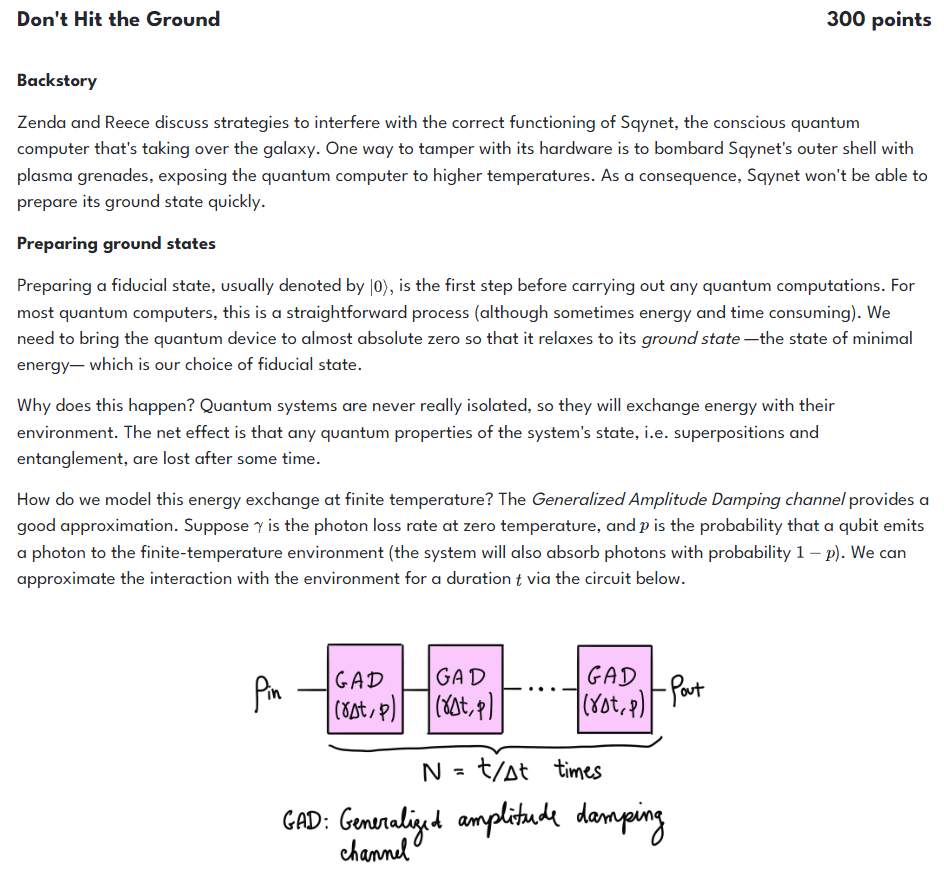

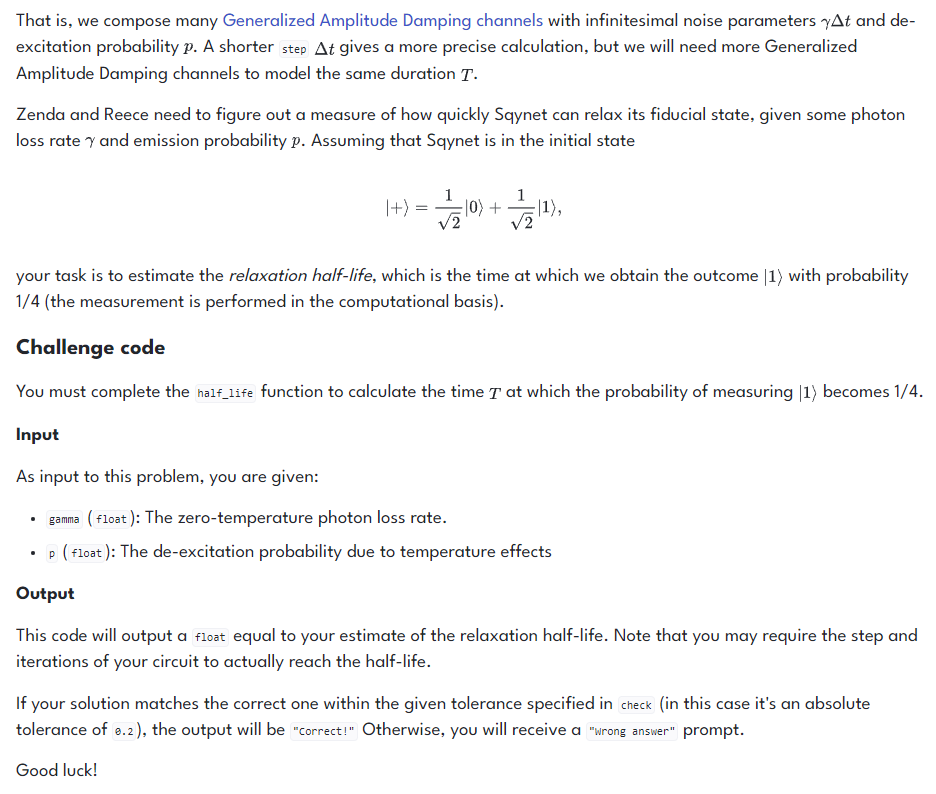

In [64]:
import json
import pennylane as qml
import pennylane.numpy as np

def half_life(gamma, p):
    """Calculates the relaxation half-life of a quantum system that exchanges energy with its environment.
    This process is modeled via Generalized Amplitude Damping.

    Args:
        gamma (float): 
            The probability per unit time of the system losing a quantum of energy
            to the environment.
        p (float): The de-excitation probability due to environmental effect

    Returns:
        (float): The relaxation haf-life of the system, as explained in the problem statement.
    """

    num_wires = 1

    dev = qml.device("default.mixed", wires=num_wires)


    # Feel free to write helper functions or global variables here

    @qml.qnode(dev)
    def noise(gamma,p,itera):
        """Implement the sequence of Generalized Amplitude Damping channels in this QNode
        You may pass instead of return if you solved this problem analytically, it's possible!

        Args:
            gamma (float): The probability per unit time of the system losing a quantum of energy
            to the environment.
        
        Returns:
            (float): The relaxation half-life.
        """
        # Don't forget to initialize the state
        # Put your code here #
        prep = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
        qml.QubitStateVector(prep, 0)

        for i in range(itera):
            qml.GeneralizedAmplitudeDamping(gamma, p, 0)
            
        return qml.probs(wires=0)
        
        # Return something or pass if you solved this analytically!

    # Write any subroutines you may need to find the relaxation time here
    delta_time = 0.1
    delta_increments=200
    time_steps = 150
    time_start=0.0
    results=[]
    
    ## iterate through 0.1, 0.2, 0.3, etc...
    for j in range(1,time_steps):
        time_start+=0.1
        print(f"STARTING {time_start}")
        gamma_new=gamma * (time_start/delta_increments)
        result = noise(gamma_new,p,delta_increments)
        ## Add result to comparison list
        results.append([time_start,result[1]])
    
    #set initial values on what we are looking for
    what_to_return = 0.0
    comparison=0.25
    current_delta=0.5
    current_value=0.0
    
    ##Iterate through and find closest end value, and then return that Time half-life
    for i in results:
        if (np.abs(comparison - i[1]) <= current_delta):
            current_delta = np.abs(comparison - i[1])
            current_value = i[1]
            what_to_return = i[0]
    
    print(f"time: {what_to_return}, halfl_value: {current_value}")

    return what_to_return
    # Return the relaxation half-life


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:

    ins = json.loads(test_case_input)
    output = half_life(*ins)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, atol=2e-1
    ), "The relaxation half-life is not quite right."


test_cases = [['[0.1,0.92]', '9.05'], ['[0.2,0.83]', '7.09']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0.1,0.92]'...
STARTING 0.1
STARTING 0.2
STARTING 0.30000000000000004
STARTING 0.4
STARTING 0.5
STARTING 0.6
STARTING 0.7
STARTING 0.7999999999999999
STARTING 0.8999999999999999
STARTING 0.9999999999999999
STARTING 1.0999999999999999
STARTING 1.2
STARTING 1.3
STARTING 1.4000000000000001
STARTING 1.5000000000000002
STARTING 1.6000000000000003
STARTING 1.7000000000000004
STARTING 1.8000000000000005
STARTING 1.9000000000000006
STARTING 2.0000000000000004
STARTING 2.1000000000000005
STARTING 2.2000000000000006
STARTING 2.3000000000000007
STARTING 2.400000000000001
STARTING 2.500000000000001
STARTING 2.600000000000001
STARTING 2.700000000000001
STARTING 2.800000000000001
STARTING 2.9000000000000012
STARTING 3.0000000000000013
STARTING 3.1000000000000014
STARTING 3.2000000000000015
STARTING 3.3000000000000016
STARTING 3.4000000000000017
STARTING 3.5000000000000018
STARTING 3.600000000000002
STARTING 3.700000000000002
STARTING 3.800000000000002
STARTING 3.90000